In [1]:
import av
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pims
import trackpy 
import trackpy as tp
from pims import ImageSequence
from Particledrop import Landing_Flashes

In [2]:
def trackpy_movie(movie, size, mmass):
    nf = movie.shape[0]
    f1 = trackpy.batch(movie[:,:,:], size, minmass=5, invert=False, processes='auto')
    t = trackpy.link(f1, 5, memory=0)
    
    t1 = trackpy.filter_stubs(t, 3)

    t2 = t1.rename(columns={'frame':'Frame'})
#     particles = t2['particle'].nunique()
#     print('Unique particles found:', + particles)
    
    # t2.groupby('Frame')['particle'].nunique().plot(kind='line')
    # plt.yticks(np.arange(0, particles+1, 5.0))
    # plt.xticks(np.arange(0, nf+1, 10.0))
    # plt.title('Number of landed particles over the series of frames')
    # plt.xlabel('Frame number')
    # plt.ylabel('Number of particles')
    # plt.grid()
    # plt.show()
    
    nparticles = []
    frames = np.arange(0,nf,1)

    for i in range(nf):
        temp = t2.loc[t2['Frame'] == i]
        nparticles.append(len(temp))

    plt.figure()
    plt.step(frames,nparticles)
    plt.yticks(np.arange(0, max(nparticles)+1, 2.0))
    plt.xticks(np.arange(0, nf+1, 5.0))
    plt.title('Stepfunction number of landed particles over the series of frames')
    plt.xlabel('Frame number')
    plt.ylabel('Number of particles')
    plt.grid()
    plt.show()
    
    t_hist = t2.drop_duplicates(subset=['particle'])
    plt.title('Found Mass Histogram')
    plt.hist(t_hist['mass'])
    plt.show()
    
#     plt.figure()
#     trackpy.annotate(t2[t2['Frame'] == nf-1], movie[nf-1]);
    
#     return t2, t_hist
    return

In [3]:
plt.rcParams['figure.figsize'] = (5, 5)

In [16]:
# video = r'C:\Users\brugg\Documents\MasterThesis\02062022\normal.avi'
video = r"E:\Ingmar\Ingmar\Experimental_data\16092022\1_stuck.avi"

In [17]:
container = av.open(video)

for frame in container.decode(video=0):
    frame.to_image().save('Images/1609_100nm_1_20000_stuck/frame%d.jpg' % frame.index)
    frame.to_image()

In [18]:
images = ImageSequence('Images/1609_100nm_1_20000_stuck/frame*.jpg')
length = len(images)
print(length)

1051


In [21]:
@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel


frames1 = gray(pims.open('Images/1609_100nm_1_20000_stuck/*.jpg'))
# frames2 = gray(pims.open('FramesOverview2/*.jpg'))

In [22]:
frames1
nf1 = len(frames1)

In [37]:
# frames2
# nf2 = len(frames2)

In [38]:
# frames1[525]

In [39]:
# overview1 = tp.locate(frames1[525], 7, minmass=700, separation=15)

In [40]:
# overview1

In [41]:
# tp.annotate(overview1, frames1[525]);
# print(len(overview1['mass']))

In [42]:
# fig, ax = plt.subplots()
# ax.hist(overview1['mass'], bins=10)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count');

In [43]:
# frames2[366]

In [44]:
# overview2 = tp.locate(frames2[366], 7, minmass=700, separation=15)

In [45]:
# overview2

In [46]:
# tp.annotate(overview2, frames2[366]);
# print(len(overview2['mass']))

In [47]:
plt.rcParams['figure.figsize'] = (10, 10)

In [48]:
# fig, ax = plt.subplots()
# ax.hist(overview2['mass'], bins=10)

# # Optionally, label the axes.
# ax.set(xlabel='mass', ylabel='count');

In [49]:
# f = tp.batch(frames[0:50], 5, minmass=56)
# f = tp.batch(frames1[20:29], 7, minmass=700, maxsize=2.2, noise_size=1.2, separation=15)

In [50]:
# tp.quiet()  # Turn off progress reports for best performance
# t = tp.link(f, 8, memory=1, )

In [51]:
# t1 = tp.filter_stubs(t, 25)
# # Compare the number of particles in the unfiltered and filtered data.
# print('Before:', t['particle'].nunique())
# print('After:', t1['particle'].nunique())

In [52]:
# plt.figure()
# tp.mass_size(t1.groupby('particle').mean()); # convenience function -- just plots size vs. mass

In [53]:
# t2 = t1[((t1['mass'] > 750) & (t1['size'] < 2.6) &
#          (t1['ecc'] < 0.5))]

In [54]:
# plt.figure()
# tp.annotate(t2[t2['frame'] == 366], frames2[366]);

In [55]:
# plt.figure()
# tp.plot_traj(t2);

In [56]:
startframe = 0
endframe = nf1
startframe2 = 1  # +1 for accounting for the moving average
endframe2 = endframe-startframe

bgcorrected2 = frames1[startframe2:endframe2] - np.mean([frames1[startframe2-1:endframe2-1]])

print(bgcorrected2.shape)  # to check the shape of the array(frames,x,y)

(1400, 1024, 1024)


Frame 1399: 10474 features


(array([3.874032e+06, 9.920965e+06, 7.304320e+05, 6.124100e+04,
        2.677100e+04, 1.450700e+04, 4.562000e+03, 2.609000e+03,
        1.001000e+03, 1.190000e+02]),
 array([  6.39304395,  58.32547886, 110.25791377, 162.19034868,
        214.12278359, 266.05521851, 317.98765342, 369.92008833,
        421.85252324, 473.78495815, 525.71739306]),
 <BarContainer object of 10 artists>)

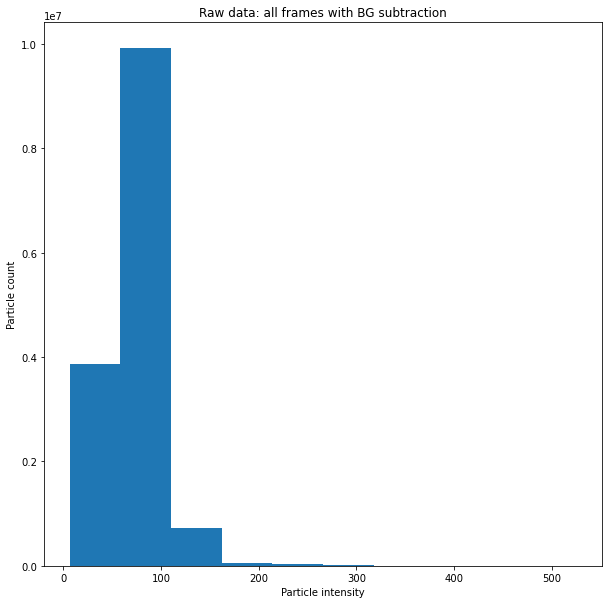

In [57]:
# t = tp.batch(bgcorrected2[:], 5, minmass=100, separation=15)
t = tp.batch(bgcorrected2[:], 5)
plt.title('Raw data: all frames with BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t['mass'])

(array([3.874032e+06, 9.920965e+06, 7.304320e+05, 6.124100e+04,
        2.677100e+04, 1.450700e+04, 4.562000e+03, 2.609000e+03,
        1.001000e+03, 1.190000e+02]),
 array([  6.39304395,  58.32547886, 110.25791377, 162.19034868,
        214.12278359, 266.05521851, 317.98765342, 369.92008833,
        421.85252324, 473.78495815, 525.71739306]),
 <BarContainer object of 10 artists>)

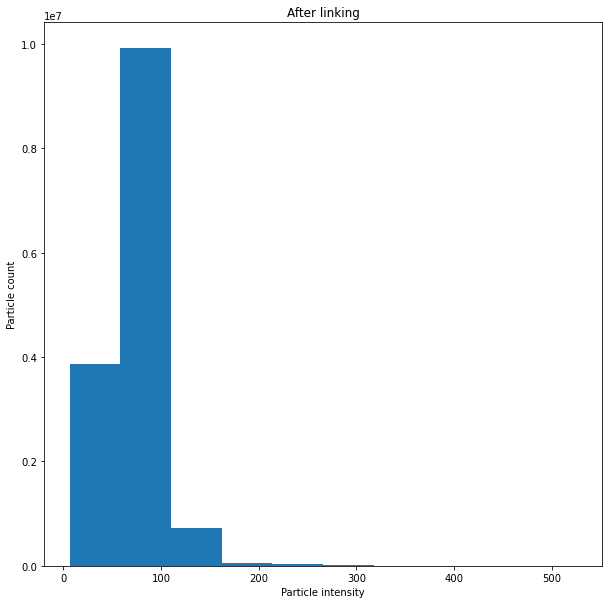

In [58]:
tp.quiet()  # Turn off progress reports for best performance
t1 = tp.link(t, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t1['mass'])

(array([4.511190e+05, 1.069432e+06, 1.009160e+05, 1.667300e+04,
        8.942000e+03, 5.858000e+03, 3.230000e+03, 2.224000e+03,
        8.560000e+02, 1.040000e+02]),
 array([  7.85291762,  59.63936516, 111.42581271, 163.21226025,
        214.9987078 , 266.78515534, 318.57160288, 370.35805043,
        422.14449797, 473.93094552, 525.71739306]),
 <BarContainer object of 10 artists>)

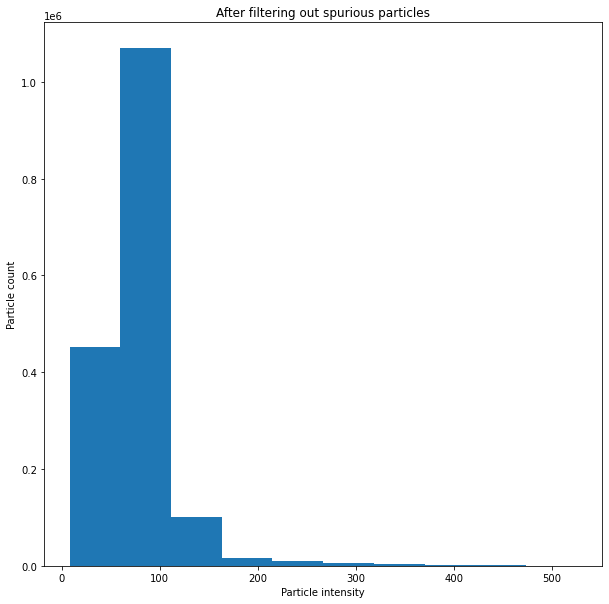

In [59]:
t2 = tp.filter_stubs(t1, 15)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t2['mass'])

(array([6235., 5013., 4062., 2778., 1921., 1633., 1174.,  554.,  191.,
          21.]),
 array([200.00149893, 232.57308835, 265.14467776, 297.71626717,
        330.28785658, 362.859446  , 395.43103541, 428.00262482,
        460.57421424, 493.14580365, 525.71739306]),
 <BarContainer object of 10 artists>)

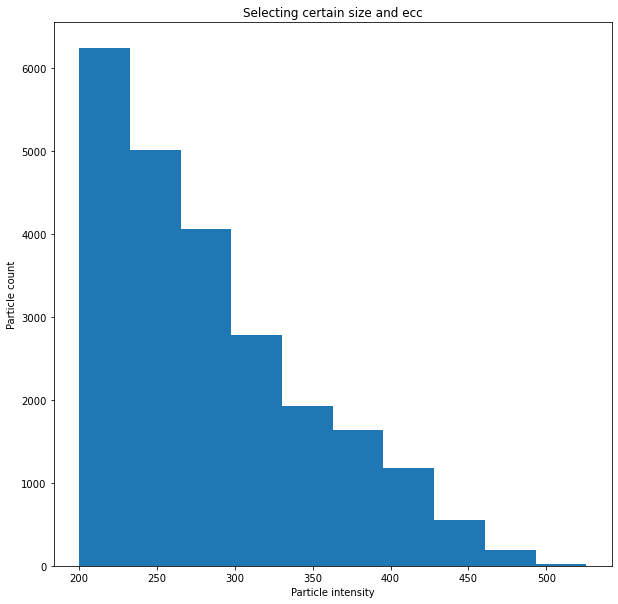

In [60]:
t3 = t2[((t2['mass'] > 200) & (t2['size'] < 2.6) &
         (t2['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t3['mass'])

Change to other frames sequence

(array([ 11149., 116440.,  53618.,  54257.,  99538., 114801.,  61179.,
         15174.,   2586.,    212.]),
 array([ 31.49473964,  85.80395216, 140.11316468, 194.4223772 ,
        248.73158972, 303.04080224, 357.35001476, 411.65922728,
        465.9684398 , 520.27765232, 574.58686484]),
 <BarContainer object of 10 artists>)

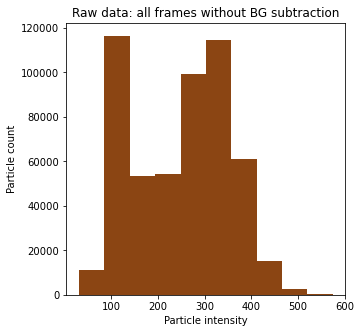

In [25]:
# t_a = tp.batch(frames1[:], 5, minmass=100, separation=15)
t_a = tp.batch(frames1[:], 5, separation=25)

plt.title('Raw data: all frames without BG subtraction')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_a['mass'], color='saddlebrown')

(array([ 11149., 116440.,  53618.,  54257.,  99538., 114801.,  61179.,
         15174.,   2586.,    212.]),
 array([ 31.49473964,  85.80395216, 140.11316468, 194.4223772 ,
        248.73158972, 303.04080224, 357.35001476, 411.65922728,
        465.9684398 , 520.27765232, 574.58686484]),
 <BarContainer object of 10 artists>)

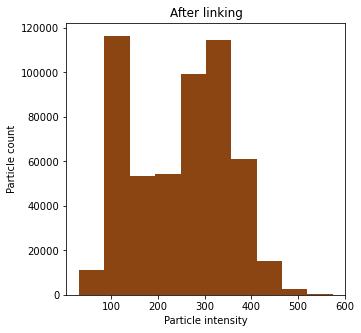

In [26]:
tp.quiet()  # Turn off progress reports for best performance
t_b = tp.link(t_a, 4, memory=2, )
plt.title('After linking')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_b['mass'], color='saddlebrown')

(array([1.300e+01, 2.200e+01, 4.500e+01, 1.250e+02, 3.000e+02, 5.640e+02,
        8.350e+02, 1.072e+03, 1.346e+03, 1.485e+03, 1.662e+03, 1.810e+03,
        2.043e+03, 2.319e+03, 2.762e+03, 3.253e+03, 3.829e+03, 4.322e+03,
        4.935e+03, 5.390e+03, 5.752e+03, 6.277e+03, 6.422e+03, 6.284e+03,
        5.882e+03, 5.351e+03, 4.520e+03, 3.643e+03, 2.734e+03, 1.960e+03,
        1.395e+03, 1.031e+03, 6.840e+02, 4.770e+02, 3.240e+02, 1.890e+02,
        9.500e+01, 3.100e+01, 1.400e+01, 3.000e+00]),
 array([ 50.02968152,  63.14361111,  76.25754069,  89.37147027,
        102.48539985, 115.59932944, 128.71325902, 141.8271886 ,
        154.94111819, 168.05504777, 181.16897735, 194.28290693,
        207.39683652, 220.5107661 , 233.62469568, 246.73862527,
        259.85255485, 272.96648443, 286.08041402, 299.1943436 ,
        312.30827318, 325.42220276, 338.53613235, 351.65006193,
        364.76399151, 377.8779211 , 390.99185068, 404.10578026,
        417.21970984, 430.33363943, 443.44756901, 456.

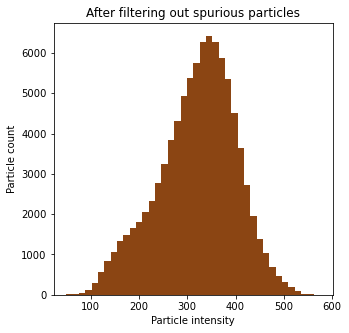

In [27]:
t_c = tp.filter_stubs(t_b, 7)
plt.title('After filtering out spurious particles')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_c['mass'], color='saddlebrown', bins=40)

(array([4.410e+02, 5.860e+02, 7.920e+02, 1.005e+03, 1.107e+03, 1.247e+03,
        1.408e+03, 1.502e+03, 1.718e+03, 1.944e+03, 2.280e+03, 2.645e+03,
        2.962e+03, 3.442e+03, 3.793e+03, 4.109e+03, 4.591e+03, 4.766e+03,
        5.178e+03, 5.391e+03, 5.068e+03, 4.998e+03, 4.648e+03, 4.140e+03,
        3.524e+03, 2.943e+03, 2.188e+03, 1.702e+03, 1.294e+03, 9.360e+02,
        7.550e+02, 5.190e+02, 4.030e+02, 2.920e+02, 1.830e+02, 1.020e+02,
        5.200e+01, 1.600e+01, 1.000e+01, 2.000e+00]),
 array([120.05022962, 131.4136455 , 142.77706139, 154.14047727,
        165.50389315, 176.86730903, 188.23072491, 199.59414079,
        210.95755667, 222.32097255, 233.68438843, 245.04780431,
        256.41122019, 267.77463607, 279.13805195, 290.50146783,
        301.86488371, 313.22829959, 324.59171547, 335.95513135,
        347.31854723, 358.68196311, 370.04537899, 381.40879487,
        392.77221075, 404.13562663, 415.49904251, 426.86245839,
        438.22587427, 449.58929015, 460.95270604, 472.

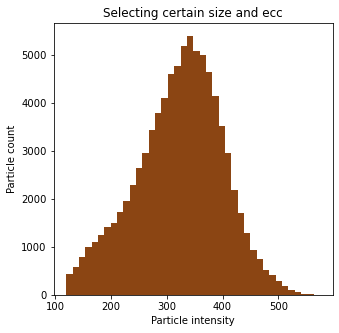

In [29]:
t_d = t_c[((t_c['mass'] > 120) & (t_c['size'] < 2.6) &
         (t_c['ecc'] < 0.5))]
plt.title('Selecting certain size and ecc')
plt.xlabel('Particle intensity')
plt.ylabel('Particle count')
plt.hist(t_d['mass'], color='saddlebrown', bins=40)